In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Clean Data_3.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,34,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
y = df['Biopsy']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=8, scoring='accuracy')
print(scores)

[0.85245902 0.8852459  0.85245902 0.93442623 0.83606557 0.86885246
 0.88333333 0.91666667]


In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8791666666666667


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       224
           1       0.16      0.19      0.17        16

    accuracy                           0.88       240
   macro avg       0.55      0.56      0.55       240
weighted avg       0.89      0.88      0.88       240



[[208  16]
 [ 13   3]]


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [15]:
X.shape

(726, 28)

In [16]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([1.95013035e-01, 1.06643985e-01, 1.44615314e-01, 1.09984105e-01,
       1.38896148e-02, 4.04246901e-02, 3.20044183e-02, 2.46914603e-02,
       1.51049554e-01, 2.08984008e-02, 3.44968358e-02, 6.07871917e-03,
       6.70281963e-03, 5.48055507e-03, 1.20792281e-03, 7.43925106e-03,
       3.45472281e-03, 9.43792514e-05, 1.51971647e-02, 3.15280644e-04,
       1.26092589e-02, 6.67564037e-04, 1.06125095e-03, 8.39826744e-03,
       1.79246157e-02, 4.45634074e-03, 1.72370771e-02, 1.79633966e-02])

In [17]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

In [18]:
feat_importances

Age                                   0.195013
Number of sexual partners             0.106644
First sexual intercourse              0.144615
Num of pregnancies                    0.109984
Smokes                                0.013890
Smokes (years)                        0.040425
Smokes (packs/year)                   0.032004
Hormonal Contraceptives               0.024691
Hormonal Contraceptives (years)       0.151050
IUD                                   0.020898
IUD (years)                           0.034497
STDs                                  0.006079
STDs (number)                         0.006703
STDs:condylomatosis                   0.005481
STDs:vaginal condylomatosis           0.001208
STDs:vulvo-perineal condylomatosis    0.007439
STDs:syphilis                         0.003455
STDs:pelvic inflammatory disease      0.000094
STDs:genital herpes                   0.015197
STDs:molluscum contagiosum            0.000315
STDs:HIV                              0.012609
STDs:Hepatiti

<AxesSubplot:>

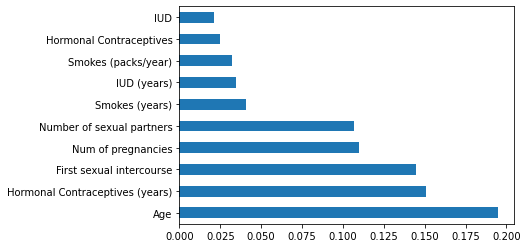

In [19]:
feat_importances.nlargest(10).plot(kind='barh')

In [20]:
model = SelectFromModel(clf, prefit=True)

In [21]:
X_new = model.transform(X)

In [22]:
X_new.shape

(726, 6)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

In [25]:
new_model = DecisionTreeClassifier()

In [26]:
new_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions = new_model.predict(X_test)

In [28]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8666666666666667


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       224
           1       0.17      0.25      0.20        16

    accuracy                           0.87       240
   macro avg       0.56      0.58      0.56       240
weighted avg       0.89      0.87      0.88       240



[[204  20]
 [ 12   4]]


In [29]:
import xgboost as xgb

In [30]:
xgb_cl = xgb.XGBClassifier()

In [31]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [32]:
predictions = xgb_cl.predict(X_test)

In [33]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9208333333333333


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       224
           1       0.20      0.06      0.10        16

    accuracy                           0.92       240
   macro avg       0.57      0.52      0.53       240
weighted avg       0.89      0.92      0.90       240



[[220   4]
 [ 15   1]]
